# 探索的データ解析
## ライブラリのインポート

In [76]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))
from conf.config import CFG, DIRS
from utils.load_datas import load_all_datas
from utils.visualize import *

## データの読み込み

In [77]:
# データのロード
train_df, test_df = load_all_datas()

In [78]:
# 確認
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3672 non-null   int64  
 1   match_date          3672 non-null   object 
 2   kick_off_time       3672 non-null   object 
 3   section             3672 non-null   object 
 4   round               3672 non-null   object 
 5   home_team           3672 non-null   object 
 6   away_team           3672 non-null   object 
 7   venue               3672 non-null   object 
 8   weather             3672 non-null   object 
 9   temperature         3672 non-null   float64
 10  humidity            3672 non-null   int64  
 11  broadcasters        3672 non-null   object 
 12  attendance          3672 non-null   int64  
 13  home_team_player11  3672 non-null   object 
 14  home_team_player10  3672 non-null   object 
 15  home_team_player9   3672 non-null   object 
 16  home_t

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  612 non-null    int64  
 1   match_date          612 non-null    object 
 2   kick_off_time       612 non-null    object 
 3   section             612 non-null    object 
 4   round               612 non-null    object 
 5   home_team           612 non-null    object 
 6   away_team           612 non-null    object 
 7   venue               612 non-null    object 
 8   weather             612 non-null    object 
 9   temperature         612 non-null    float64
 10  humidity            612 non-null    int64  
 11  broadcasters        612 non-null    object 
 12  home_team_player11  612 non-null    object 
 13  home_team_player10  612 non-null    object 
 14  home_team_player9   612 non-null    object 
 15  home_team_player8   612 non-null    object 
 16  home_tea

## 表記揺れの修正
### home_team

In [79]:
train_df.loc[:, "home_team"].unique()

array(['G大阪', '甲府', 'FC東京', '磐田', '名古屋', '大宮', '川崎F', '広島', '横浜FM', '浦和',
       '千葉', '新潟', '清水', '鹿島', '京都', '福岡', '大分', 'C大阪', '柏', '横浜FC', '神戸',
       '札幌', '東京V', '山形', '湘南', '仙台', '鳥栖', '徳島', '松本', 'Ｃ大阪', 'Ｇ大阪',
       '川崎Ｆ'], dtype=object)

In [80]:
table = str.maketrans(
    'ＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺ', 'ABCDEFGHIJKLMNOPQRSTUVWXYZ',
)

train_df.loc[:, "home_team"] = train_df.loc[:, "home_team"].apply(lambda text: text.translate(table))
test_df.loc[:, "home_team"] = test_df.loc[:, "home_team"].apply(lambda text: text.translate(table))

### away_team

In [81]:
train_df.loc[:, "away_team"].unique()

array(['浦和', '清水', '大分', '福岡', 'C大阪', '千葉', '新潟', '鹿島', '京都', '磐田', '甲府',
       'FC東京', '名古屋', '横浜FM', '川崎F', '大宮', '広島', 'G大阪', '神戸', '横浜FC', '柏',
       '札幌', '東京V', '山形', '仙台', '湘南', '鳥栖', '徳島', '松本', '川崎Ｆ', 'Ｃ大阪',
       'Ｇ大阪'], dtype=object)

In [82]:
train_df.loc[:, "away_team"] = train_df.loc[:, "away_team"].apply(lambda text: text.translate(table))
test_df.loc[:, "away_team"] = test_df.loc[:, "away_team"].apply(lambda text: text.translate(table))

## カテゴリ変数分析

## match_date

In [83]:
# 日付に変換
train_df["match_date"] = pd.to_datetime(train_df["match_date"])
test_df["match_date"] = pd.to_datetime(test_df["match_date"])

### 年

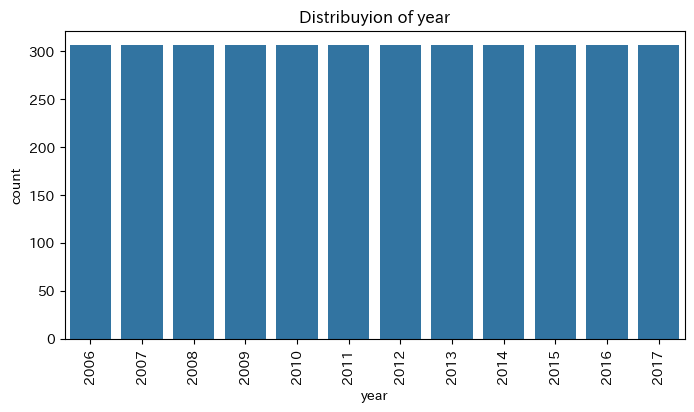

In [102]:
# 年毎の推移を見てみる
train_df["year"] = train_df["match_date"].dt.year
test_df["year"] = test_df["match_date"].dt.year
plot_cat_counts(df=train_df, categorical_var="year")

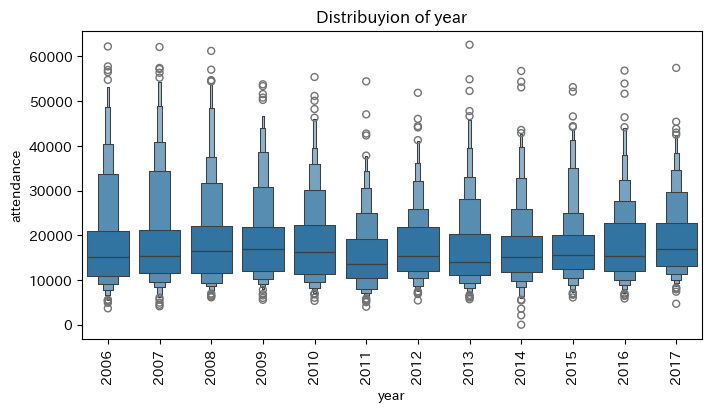

In [101]:
plot_cat_distribution(df=train_df, categorical_var="year", target_var="attendance")

### 月

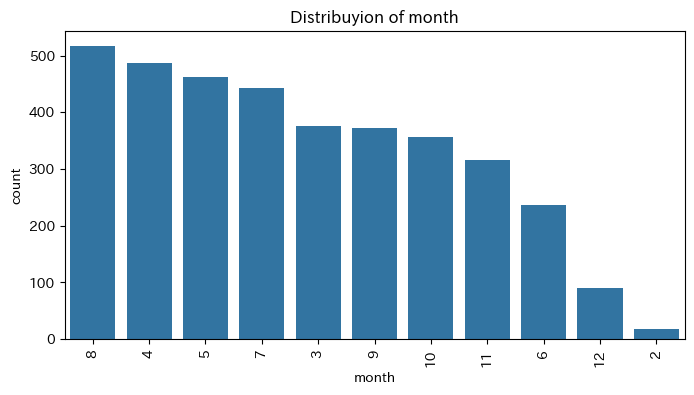

In [85]:
# 月ごとに推移を見てみる
train_df["month"] = train_df["match_date"].dt.month
test_df["month"] = test_df["match_date"].dt.month
# カウント数
plot_cat_counts(df=train_df, categorical_var="month")

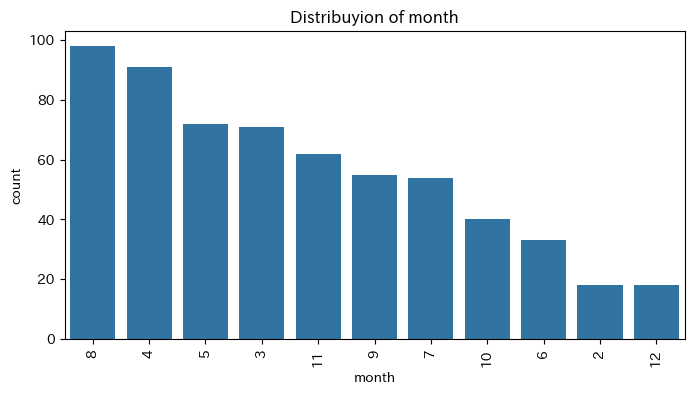

In [86]:
# テストデータ
plot_cat_counts(df=test_df, categorical_var="month")

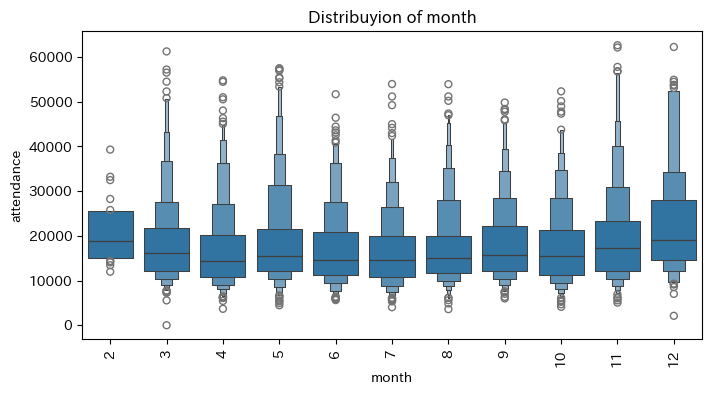

In [12]:
# 分布
plot_cat_distribution(df=train_df, categorical_var="month", target_var="attendance")

### 曜日

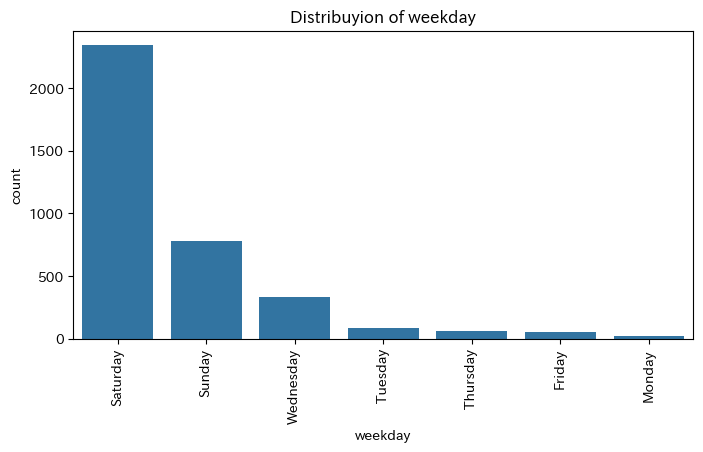

In [87]:
# 曜日ごとに見てみる
train_df["weekday"] = train_df["match_date"].dt.day_name()
test_df["weekday"] = test_df["match_date"].dt.day_name()
plot_cat_counts(train_df, categorical_var="weekday")

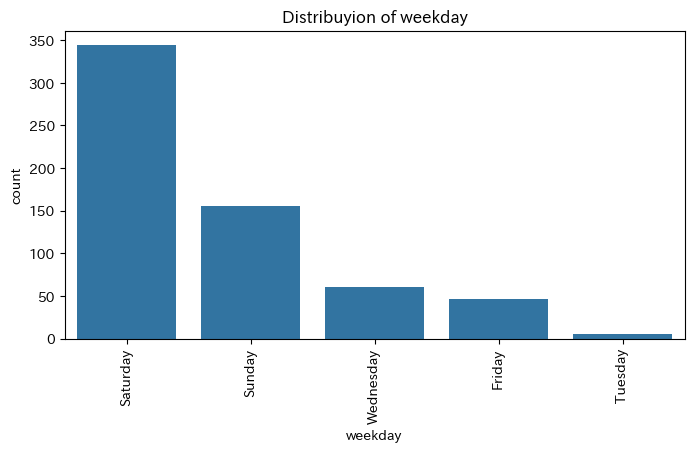

In [88]:
# テストデータ
plot_cat_counts(test_df, categorical_var="weekday")

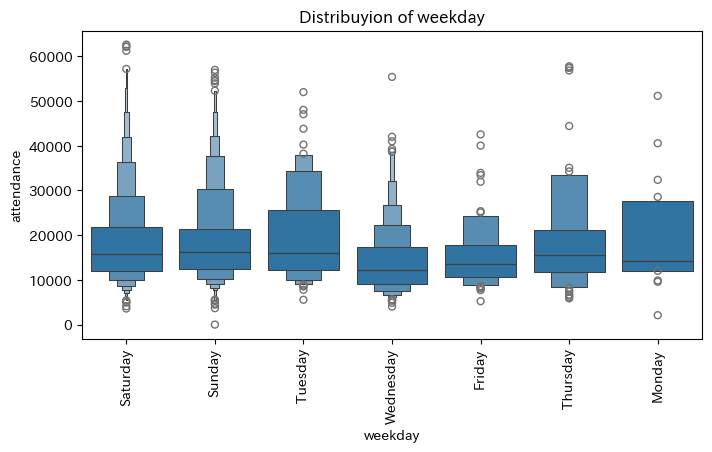

In [14]:
# 分布
plot_cat_distribution(train_df, categorical_var="weekday", target_var="attendance")

### 日付

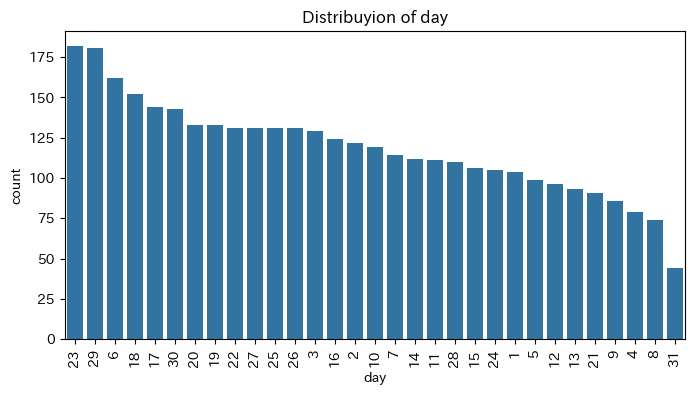

In [89]:
# 日付ごとにも見てみる
train_df["day"] = train_df["match_date"].dt.day
test_df["day"] = test_df["match_date"].dt.day

# カウント
plot_cat_counts(train_df, categorical_var="day")

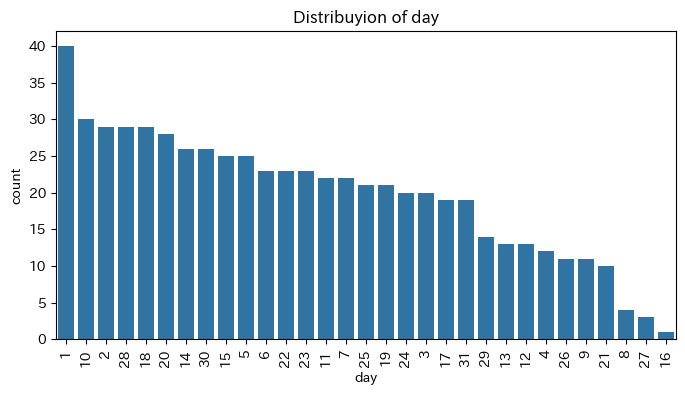

In [90]:
# テストデータ
plot_cat_counts(test_df, categorical_var="day")

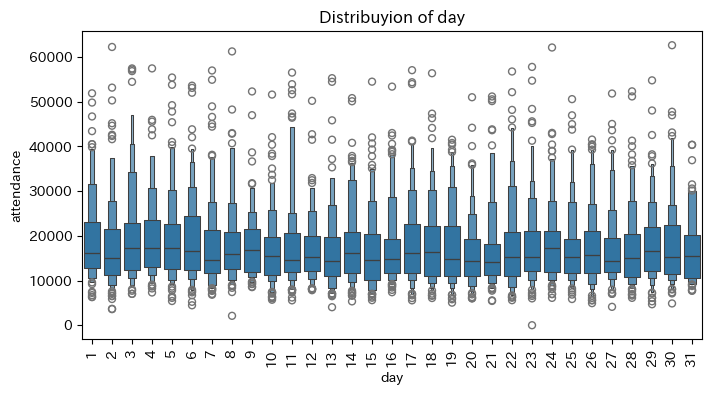

In [16]:
# 分布
plot_cat_distribution(train_df, categorical_var="day", target_var="attendance")

### 祝日

In [91]:
# データの作成
holiday_df = pd.read_csv(os.path.join(DIRS["DATA"], "holidays_in_japan.csv"))
holiday_df["holiday_date"] = pd.to_datetime(holiday_df["holiday_date"])

# 結合
train_df = pd.merge(train_df, holiday_df, left_on="match_date", right_on="holiday_date", how="left")
train_df["is_holiday"] = train_df["description"].apply(lambda val: 0 if pd.isna(val) else 1)

test_df = pd.merge(test_df, holiday_df, left_on="match_date", right_on="holiday_date", how="left")
test_df["is_holiday"] = test_df["description"].apply(lambda val: 0 if pd.isna(val) else 1)

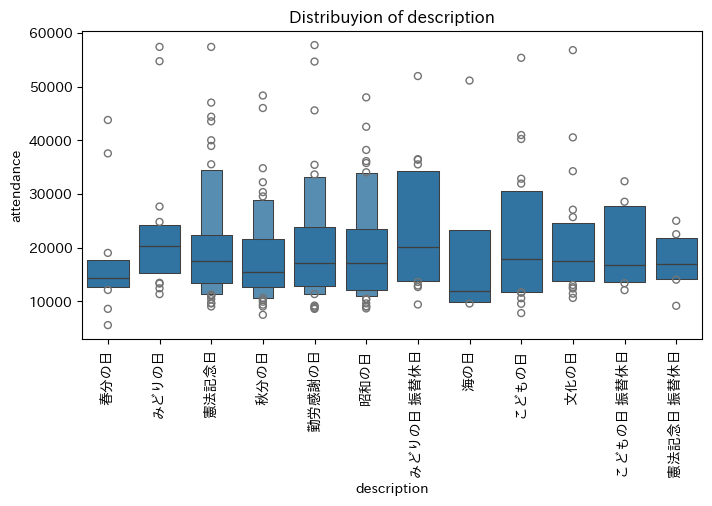

In [92]:
# カウント
plot_cat_distribution(train_df, categorical_var="description", target_var="attendance")

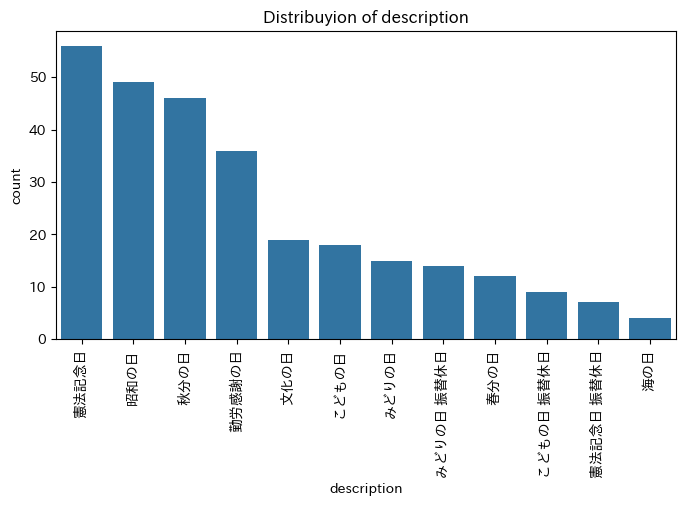

In [95]:
plot_cat_counts(train_df, categorical_var="description")

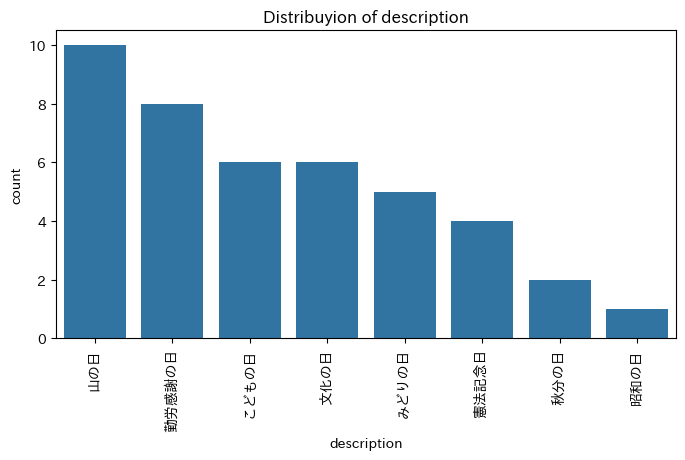

In [97]:
# カウント
plot_cat_counts(test_df, categorical_var="description")

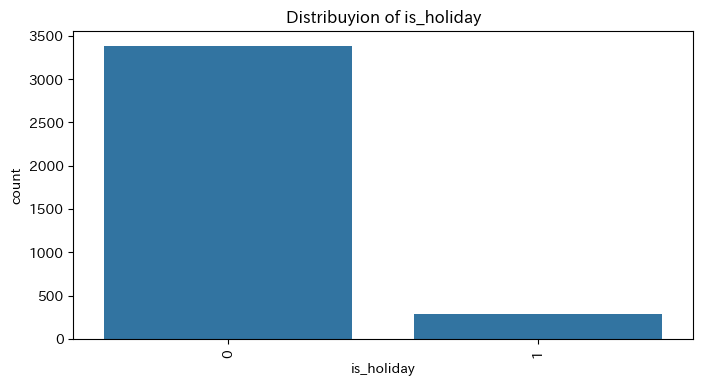

In [100]:
# カウント
plot_cat_counts(train_df, "is_holiday")

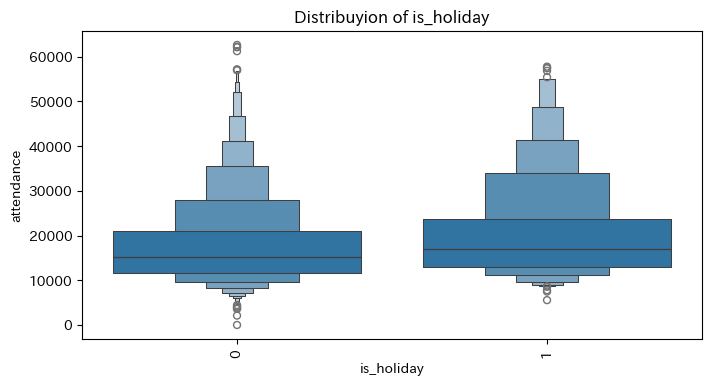

In [98]:
# 分布
plot_cat_distribution(train_df, categorical_var="is_holiday", target_var="attendance")

## kick_off_time

In [ ]:
# 時間オブジェクトに変換
train_df["kick_off_time"] = pd.to_datetime(train_df["kick_off_time"])
train_df["hour"] = train_df["kick_off_time"].dt.hour

### 時間ごとに可視化

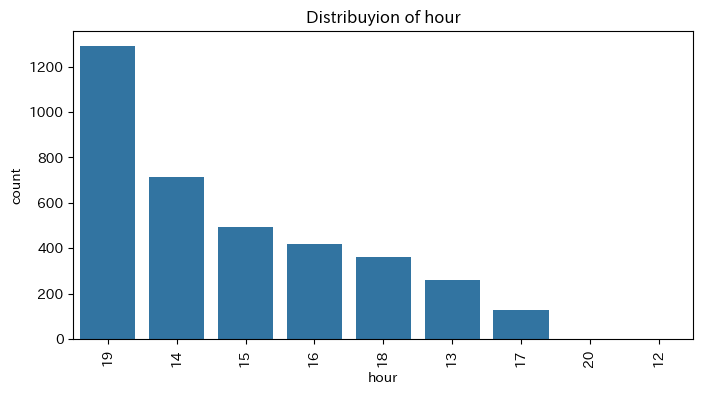

In [20]:
plot_cat_counts(train_df, categorical_var="hour")

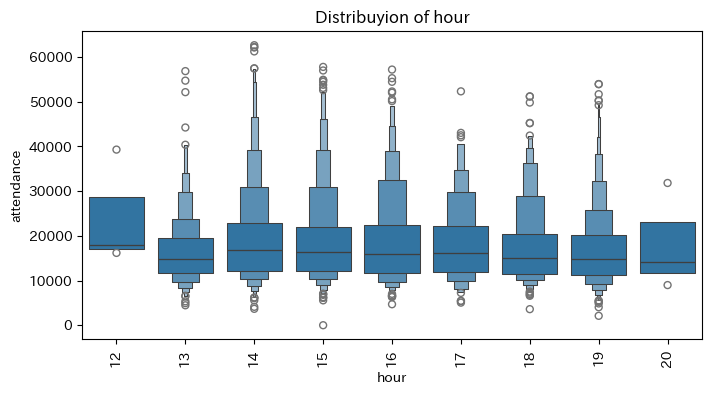

In [21]:
plot_cat_distribution(train_df, categorical_var="hour", target_var="attendance")

## section

In [22]:
train_df["section"].unique()

array(['第1節', '第2節', '第3節', '第4節', '第5節', '第6節', '第7節', '第8節', '第9節',
       '第10節', '第11節', '第12節', '第13節', '第14節', '第15節', '第16節', '第17節',
       '第18節', '第19節', '第20節', '第21節', '第22節', '第23節', '第24節', '第25節',
       '第26節', '第27節', '第28節', '第29節', '第30節', '第31節', '第32節', '第33節',
       '第34節'], dtype=object)

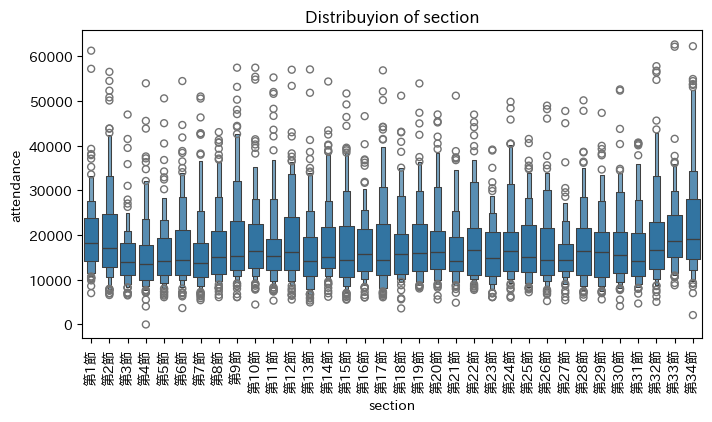

In [23]:
plot_cat_distribution(train_df, "section", "attendance")

## round

In [24]:
train_df["round"].unique()

array(['第1日', '第2日', '第3日', '第4日'], dtype=object)

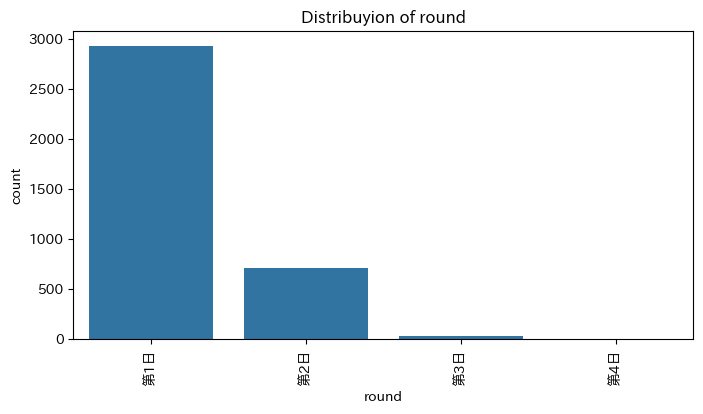

In [25]:
plot_cat_counts(train_df, "round")

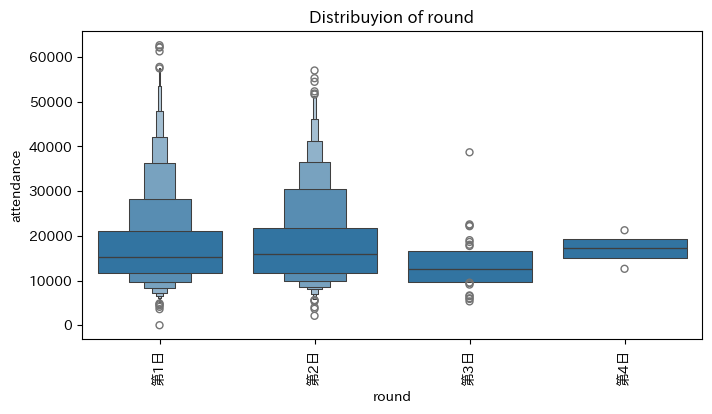

In [26]:
plot_cat_distribution(train_df, "round", "attendance")

## home_team

In [27]:
train_df.loc[:, "home_team"].unique()

array(['G大阪', '甲府', 'FC東京', '磐田', '名古屋', '大宮', '川崎F', '広島', '横浜FM', '浦和',
       '千葉', '新潟', '清水', '鹿島', '京都', '福岡', '大分', 'C大阪', '柏', '横浜FC', '神戸',
       '札幌', '東京V', '山形', '湘南', '仙台', '鳥栖', '徳島', '松本'], dtype=object)

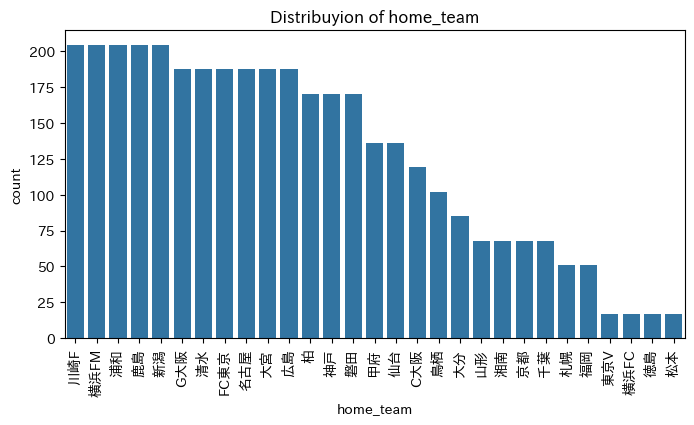

In [28]:
# カテゴリごとのカウント
plot_cat_counts(train_df, categorical_var="home_team")

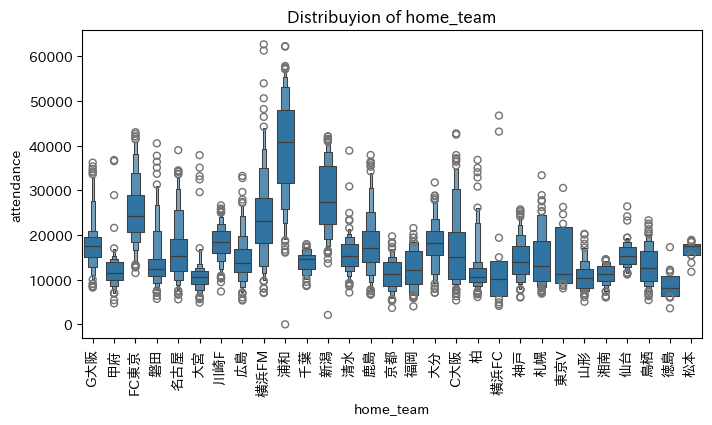

In [29]:
plot_cat_distribution(train_df, categorical_var="home_team", target_var="attendance")

## away_team

In [30]:
train_df.loc[:, "away_team"].unique()

array(['浦和', '清水', '大分', '福岡', 'C大阪', '千葉', '新潟', '鹿島', '京都', '磐田', '甲府',
       'FC東京', '名古屋', '横浜FM', '川崎F', '大宮', '広島', 'G大阪', '神戸', '横浜FC', '柏',
       '札幌', '東京V', '山形', '仙台', '湘南', '鳥栖', '徳島', '松本'], dtype=object)

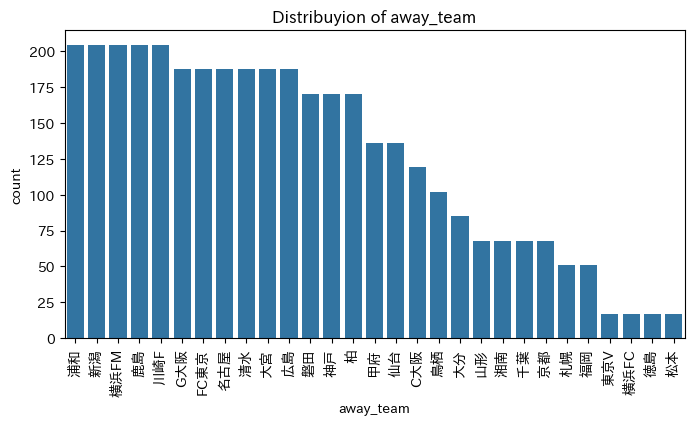

In [31]:
# カテゴリごとのカウント
plot_cat_counts(train_df, categorical_var="away_team")

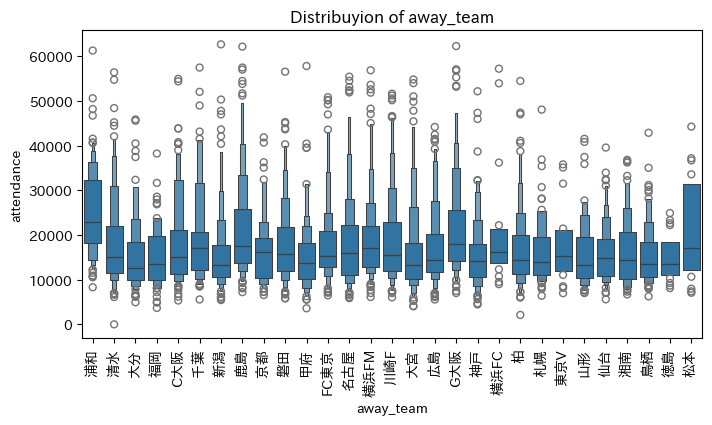

In [32]:
plot_cat_distribution(train_df, categorical_var="away_team", target_var="attendance")

## venue

In [103]:
train_df.loc[:, "venue"].unique()

array(['万博記念競技場', '山梨県小瀬スポーツ公園陸上競技場', '味の素スタジアム', '静岡スタジアムエコパ',
       '名古屋市瑞穂陸上競技場', '埼玉スタジアム2002', '等々力陸上競技場', '広島ビッグアーチ', '日産スタジアム',
       'フクダ電子アリーナ', '新潟スタジアム', '日本平スタジアム', '県立カシマサッカースタジアム',
       '京都市西京極総合運動公園陸上競技場兼球技場', '東平尾公園博多の森球技場', '九州石油ドーム', '大阪長居スタジアム',
       'ヤマハスタジアム(磐田)', '豊田スタジアム', 'さいたま市浦和駒場スタジアム', '松本平広域公園総合球技場',
       '石川県西部緑地公園陸上競技場', '熊谷スポーツ文化公園陸上競技場', '国立競技場', '横浜市三ツ沢公園球技場',
       '大阪長居第2陸上競技場', '熊本県民総合運動公園陸上競技場', '日立柏サッカー場', '東北電力ビッグスワンスタジアム',
       'ホームズスタジアム神戸', '柏の葉公園総合競技場', 'エコパスタジアム', '神戸総合運動公園ユニバー記念競技場',
       '名古屋市瑞穂球技場', 'NACK5スタジアム大宮', '札幌ドーム', 'ニッパツ三ツ沢球技場', '鹿児島県立鴨池陸上競技場',
       '札幌厚別公園競技場', 'アウトソーシングスタジアム日本平', 'NDソフトスタジアム山形', '平塚競技場',
       'ユアテックスタジアム仙台', '宮城スタジアム', 'キンチョウスタジアム', '山梨中銀スタジアム',
       'レベルファイブスタジアム', 'コカ・コーラウエスト広島スタジアム', 'ベストアメニティスタジアム',
       '佐賀県総合運動場陸上競技場', 'エディオンスタジアム広島', '大分銀行ドーム', 'IAIスタジアム日本平',
       'ShonanBMWスタジアム平塚', 'ヤンマースタジアム長居', 'デンカビッグスワンスタジアム',
       '鳴門・大塚スポーツパークポカリスエットスタジアム', 'ノエビアスタジアム神戸', 'パロマ瑞穂スタジアム',
  

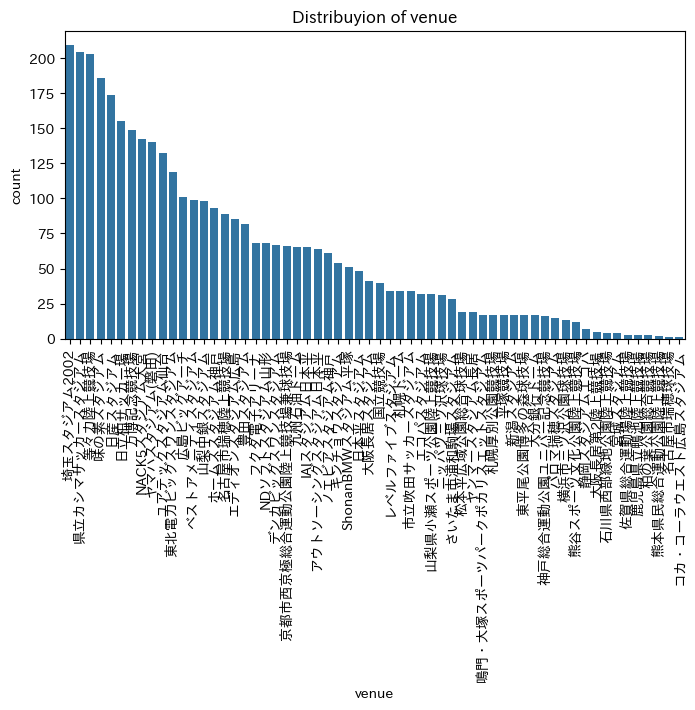

In [104]:
plot_cat_counts(train_df, "venue")

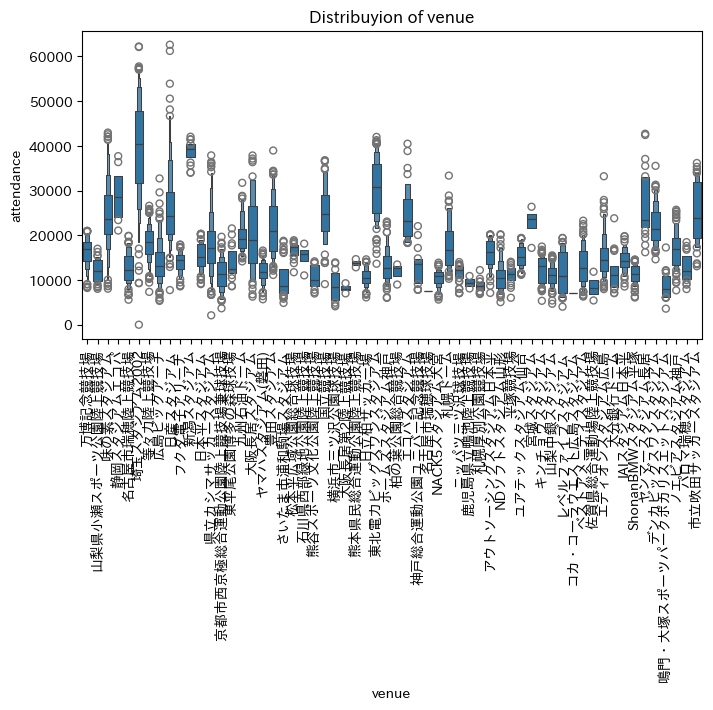

In [105]:
plot_cat_distribution(train_df, "venue", "attendance")

## weather

In [33]:
train_df.loc[:, "weather"].unique()

array(['晴', '曇', '屋内', '曇時々晴', '雨', '曇のち雨', '晴一時雨', '晴時々曇', '晴のち曇',
       '曇一時雨', '雨のち曇', '雨一時曇', '曇のち雨のち屋内', '曇時々晴のち屋内', '曇のち晴', '曇時々雨',
       '雨のち曇時々雨', '曇時々雪', '晴一時曇', '雨時々曇', '曇一時雨のち曇', '曇のち雨一時雷', '晴時々曇一時雨',
       '霧', '雷雨のち曇', '曇一時雷雨のち雨', '晴一時雨のち曇', '曇のち雷雨', '雨一時曇のち雨', '雪',
       '雨のち曇のち晴', '晴のち雨', '曇一時晴', '曇一時雨のち晴', '雨のち晴', '晴のち曇一時雨',
       '曇一時雷雨のち曇', '晴時々雪', '雨時々晴', '曇時々雨のち晴', '曇時々晴一時雨', '雨のち曇一時雨',
       '晴のち雪', '雨一時雷雨', '曇のち雨のち曇', '曇のち雨のち晴', '曇晴', '曇のち霧', '雨のち曇のち雨'],
      dtype=object)

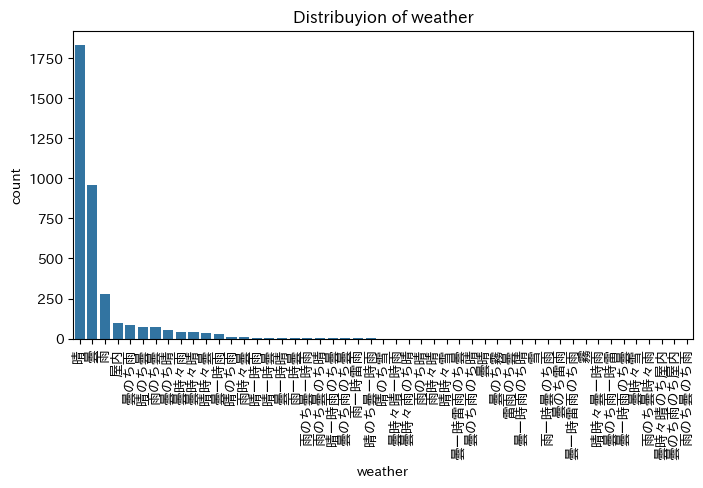

In [63]:
# カテゴリごとのカウント
plot_cat_counts(df=train_df, categorical_var="weather")

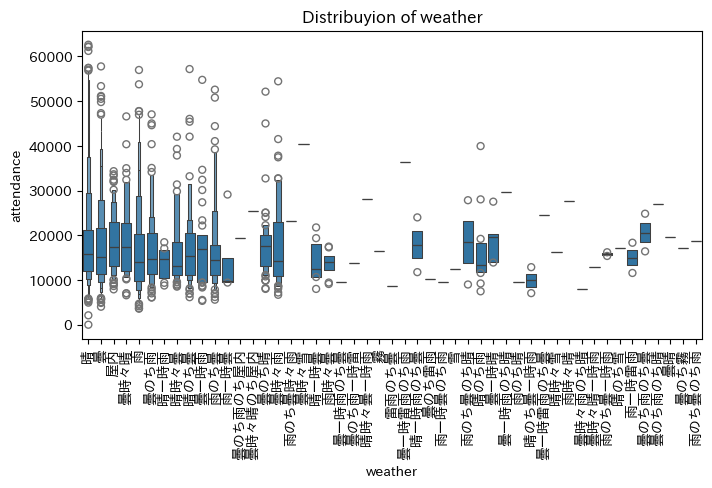

In [70]:
# カテゴリごとの目的変数の分布
plot_cat_distribution(df=train_df, categorical_var="weather", target_var="attendance")

### 集約してみる

In [64]:
def aggredate_weather(value):
    if "屋内" in value:
        return "屋内"
    elif len(value) == 1:
        return value
    else:
        return value[0]

train_df["agg_weather"] = train_df["weather"].apply(aggredate_weather)

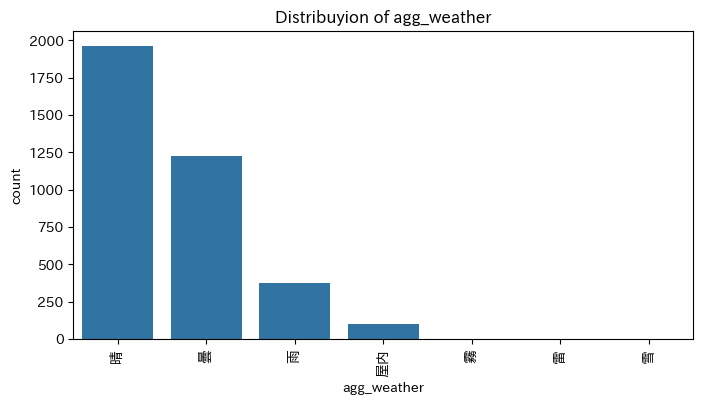

In [66]:
plot_cat_counts(train_df, "agg_weather")

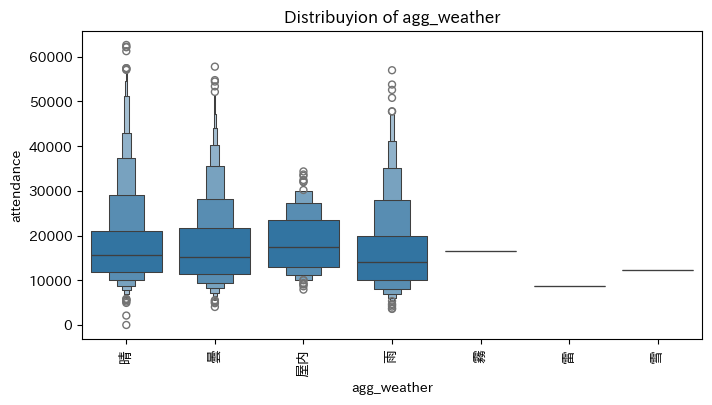

In [67]:
plot_cat_distribution(train_df, "agg_weather", "attendance")

In [73]:
# カテゴリごとのターゲット変数の平均
mean_target = train_df.groupby("agg_weather")["attendance"].mean()
train_df["agg_weather_encode"] = train_df["agg_weather"].map(mean_target)


## broadcasters

In [36]:
train_df["broadcasters"].unique()

array(['NHK総合/J SPORTS(録)', '山梨放送/テレビ静岡(録)/J SPORTS(録)',
       'BS-i/MXテレビ(録)/J SPORTS(録)', 'J SPORTS',
       'スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録)',
       'テレビ埼玉/BS(録)/J SPORTS(録)', 'J SPORTS(録)', 'BS/J SPORTS(録)',
       'BS-i/KBS京都(録)/J SPORTS(録)', 'TBS(単)/静岡放送/テレビ埼玉(録)/J SPORTS(録)',
       'スカイパーフェクTV!/千葉テレビ(録)/山梨放送(録)/J SPORTS(録)', 'テレビ静岡/J SPORTS',
       'NHK大阪/BS-i/KBS京都(録)/J SPORTS(録)', 'BS/テレビ西日本(録)/J SPORTS(録)',
       'BS-i/J SPORTS(録)', '静岡放送/KBS京都(録)/J SPORTS(録)',
       'NHK広島/スカイパーフェクTV!/J SPORTS(録)', 'テレビ埼玉(録)/J SPORTS(録)',
       '名古屋テレビ/J SPORTS(録)', 'NHK福岡/NHK名古屋/J SPORTS(録)',
       'BS/テレビ埼玉(録)/J SPORTS(録)', '新潟テレビ21/J SPORTS(録)',
       'テレビ静岡/J SPORTS(録)', 'BS/KBS京都(録)/J SPORTS(録)',
       'スカイパーフェクTV!/J SPORTS(録)', 'TBS(単)/J SPORTS(録)',
       'BS-i/中京テレビ(録)/J SPORTS(録)', 'NHK甲府/BS/J SPORTS(録)',
       'NHK新潟/J SPORTS(録)', 'テレビ埼玉/BS-i/J SPORTS(録)',
       '山梨放送/テレビ信州/テレビ新潟/J SPORTS(録)', '静岡放送/BS-i/J SPORTS(録)',
       'BS-i/テレビ埼玉(録)/KBS京都(録)/J SPORTS(録

In [37]:
split_df = train_df["broadcasters"].str.split("/", expand=True)
train_df["bureau"] = split_df.iloc[:, 0]

In [38]:
train_df["bureau"].unique()

array(['NHK総合', '山梨放送', 'BS-i', 'J SPORTS', 'スカイパーフェクTV!', 'テレビ埼玉',
       'J SPORTS(録)', 'BS', 'TBS(単)', 'テレビ静岡', 'NHK大阪', '静岡放送', 'NHK広島',
       'テレビ埼玉(録)', '名古屋テレビ', 'NHK福岡', '新潟テレビ21', 'NHK甲府', 'NHK新潟',
       'NHK大分', '新潟総合テレビ', 'MXテレビ', 'BS-i(録)', 'KBS京都', 'NHK静岡', 'テレ玉',
       '東海テレビ(録)', '静岡放送(録)', '中部日本放送(録)', 'RKB毎日放送(録)', 'MXテレビ*',
       'KBS京都(録)', 'BS(録)', 'テレビ新潟', 'テレビ山梨', 'BSーi',
       'スカパー!(パーフェクト チョイス)', 'スカパー!・e2(TBSチャンネル)',
       'スカパー!・e2(J sports Plus)', 'スカパー!e2(J sports Plus)',
       'スカパー!・e2(J sprots Plus)', 'スカパースカチャン', 'スカパー・e2(TBSチャンネル)',
       'スカパー(スカチャンHD、スカチャン)', 'スカパー・e2(J sports Plus)',
       'スカパー・e2(J sporst Plus)', 'スカパー・e2(J Sports Plus)', 'スカパー',
       'スカパー!', 'DAZN',
       'DAZN ※AFCチャンピオンズリーグ2017の影響により、川崎Fvs浦和は7月5日(水)に開催',
       'DAZN ※AFCチャンピオンズリーグ2017の影響により、G大阪vs鹿島は7月5日(水)に開催'], dtype=object)

In [39]:
# 置換用の関数
def replace_bureau(val) -> str:
    if "スカパー" in val:
        return "スカパー"
    if "DAZN" in val:
        return "DAZN"
    else:
        return "地上波"

train_df["bureau"] = train_df["bureau"].apply(replace_bureau)
train_df["bureau"].unique()

array(['地上波', 'スカパー', 'DAZN'], dtype=object)

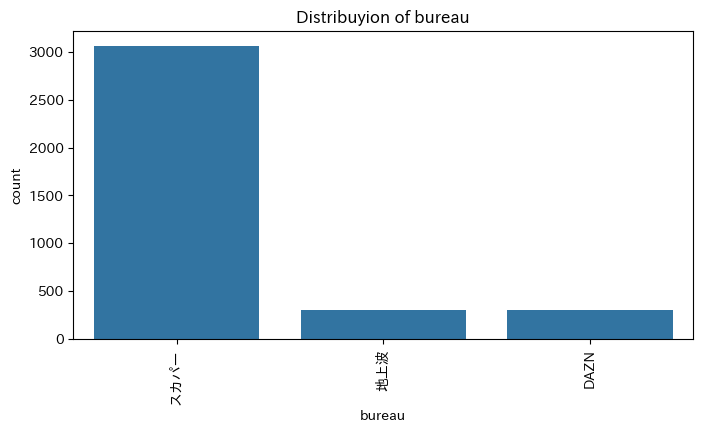

In [40]:
plot_cat_counts(train_df, "bureau")

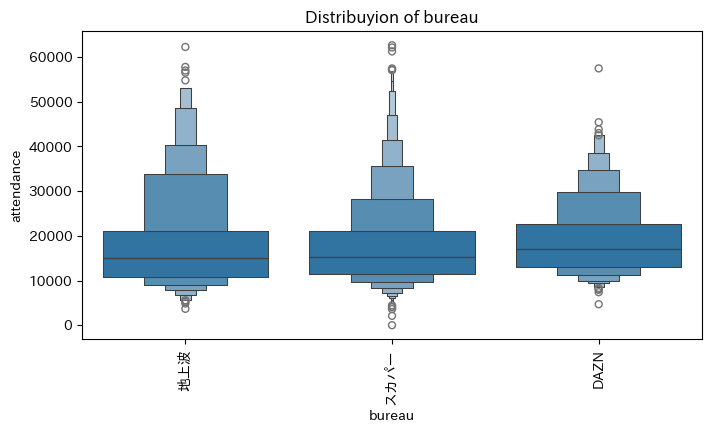

In [41]:
plot_cat_distribution(train_df, "bureau", "attendance")

## address

In [42]:
train_df.loc[:, "address"].unique()

array(['大阪府吹田市千里万博公園5-2', '山梨県甲府市小瀬町840', '東京都調布市西町376−3',
       '静岡県袋井市愛野2300−1', '愛知県名古屋市瑞穂区山下通5-1', '埼玉県さいたま市緑区中野田500',
       '神奈川県川崎市中原区等々力1−1', '広島県広島市安佐南区大塚西5丁目1−1', '神奈川県横浜市港北区小机町3300',
       '千葉県千葉市中央区川崎町1−20', '新潟県新潟市中央区清五郎67-12', '静岡県静岡市清水区村松3880−1',
       '茨城県鹿嶋市神向寺後山26−2', '京都府京都市右京区西京極新明町29', '福岡県福岡市博多区東平尾公園2丁目1−2',
       '大分県大分市横尾1351', '大阪府大阪市東住吉区長居公園1-1', '静岡県磐田市新貝2500',
       '愛知県豊田市千石町7丁目2', '埼玉県さいたま市浦和区駒場2丁目1−1', '長野県松本市神林5300',
       '石川県金沢市袋畠町南136', '埼玉県熊谷市上川上300 熊谷スポーツ文化公園内', '東京都新宿区霞ヶ丘町10−1',
       '神奈川県横浜市神奈川区三ツ沢西町3-1', '大阪府大阪市東住吉区長居公園1−1',
       '熊本県熊本市東区平山町2776 2776番地', '千葉県柏市日立台1-2-50', '兵庫県神戸市兵庫区御崎町1丁目2−2',
       '千葉県柏市柏の葉4丁目1', '兵庫県神戸市須磨区緑台', '愛知県名古屋市瑞穂区山下通5丁目1',
       '埼玉県さいたま市大宮区高鼻町4丁目', '北海道札幌市豊平区羊ヶ丘1', '神奈川県横浜市神奈川区三ツ沢西町3−1',
       '鹿児島県鹿児島市与次郎2丁目2−2', '北海道札幌市厚別区上野幌3条1-2-1', '山形県天童市山王1−1',
       '神奈川県平塚市大原1−1', '宮城県仙台市泉区七北田柳78', '宮城県宮城郡利府町菅谷字舘40-1',
       '福岡県福岡市博多区東平尾公園2丁目1−1', '広島県広島市西区観音新町2丁目11−124', '佐賀県鳥栖市京町812',
       '佐賀県佐賀市日の出2-1-1

In [44]:
# 県と市を抽出する
import re

pattern = re.compile(r'(?P<prefecture>.+?[都道府県])(?P<city>.+?[市区町村])')

def extract_components(address):
    match = pattern.match(address)
    if match:
        return match.groupdict()
    return {'prefecture': None, 'city': None}

component_df = train_df.loc[:, "address"].apply(extract_components).apply(pd.Series)

component_df.head()

train_df = pd.concat([train_df, component_df], axis=1)

In [45]:
train_df["prefecture"].unique()

array(['大阪府', '山梨県', '東京都', '静岡県', '愛知県', '埼玉県', '神奈川県', '広島県', '千葉県',
       '新潟県', '茨城県', '京都', '福岡県', '大分県', '長野県', '石川県', '熊本県', '兵庫県',
       '北海道', '鹿児島県', '山形県', '宮城県', '佐賀県', '徳島県'], dtype=object)

In [46]:
component_df["city"].unique()

array(['吹田市', '甲府市', '調布市', '袋井市', '名古屋市', 'さいたま市', '川崎市', '広島市', '横浜市',
       '千葉市', '新潟市', '静岡市', '鹿嶋市', '府京都市', '福岡市', '大分市', '大阪市', '磐田市',
       '豊田市', '松本市', '金沢市', '熊谷市', '新宿区', '熊本市', '柏市', '神戸市', '札幌市',
       '鹿児島市', '天童市', '平塚市', '仙台市', '宮城郡利府町', '鳥栖市', '佐賀市', '鳴門市'],
      dtype=object)

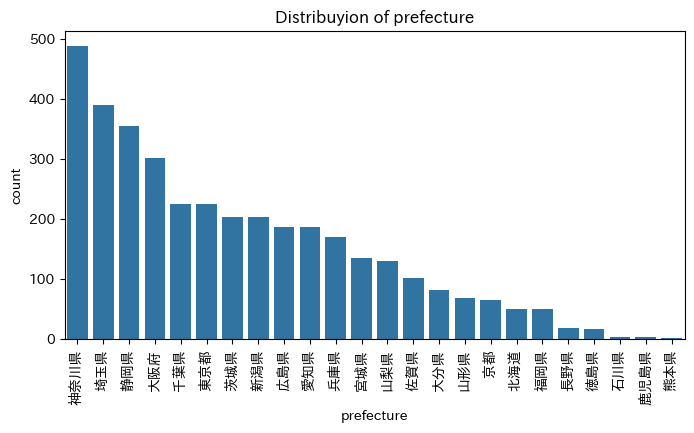

In [47]:
plot_cat_counts(train_df, "prefecture")

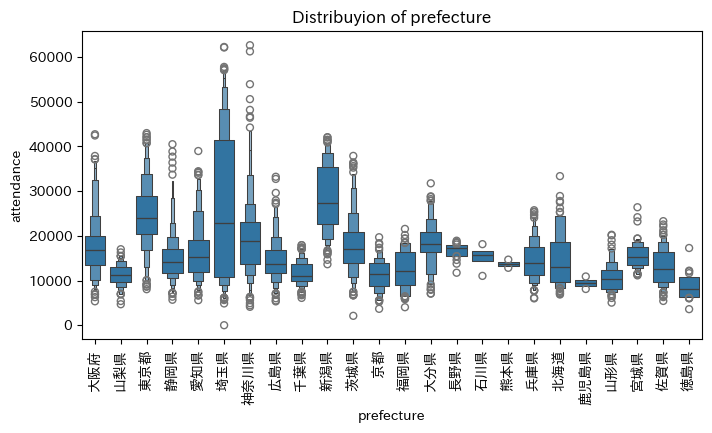

In [48]:
plot_cat_distribution(train_df, "prefecture", "attendance")

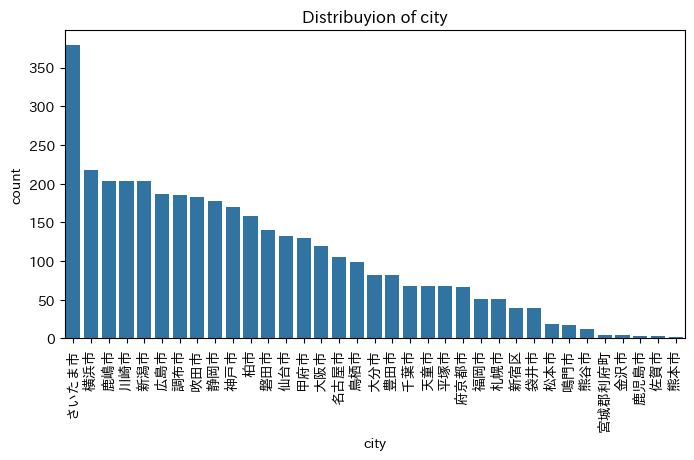

In [49]:
plot_cat_counts(train_df, "city")

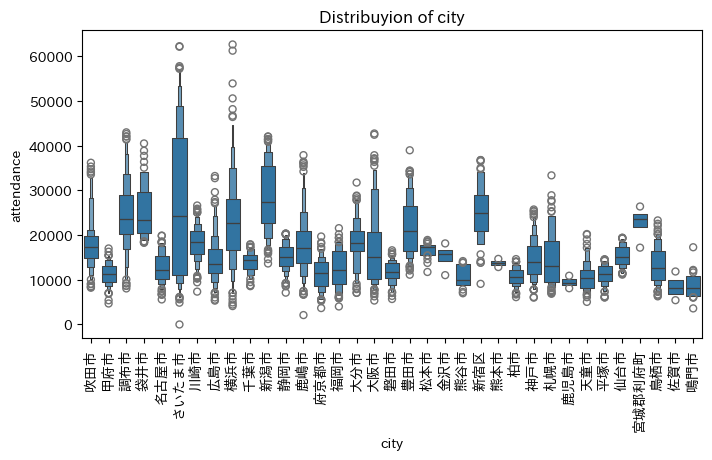

In [50]:
plot_cat_distribution(train_df, "city", "attendance")

## home_team_score

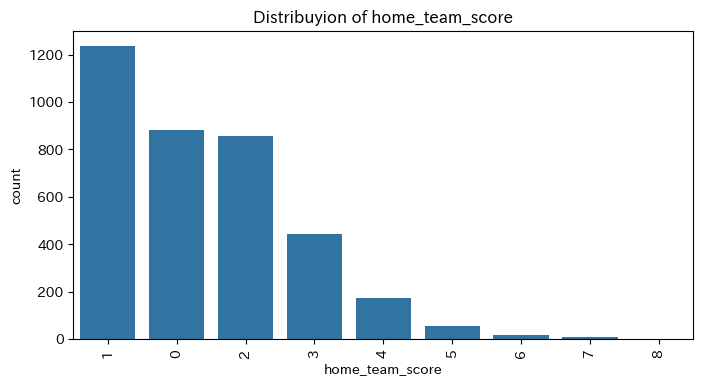

In [59]:
plot_cat_counts(train_df, "home_team_score")

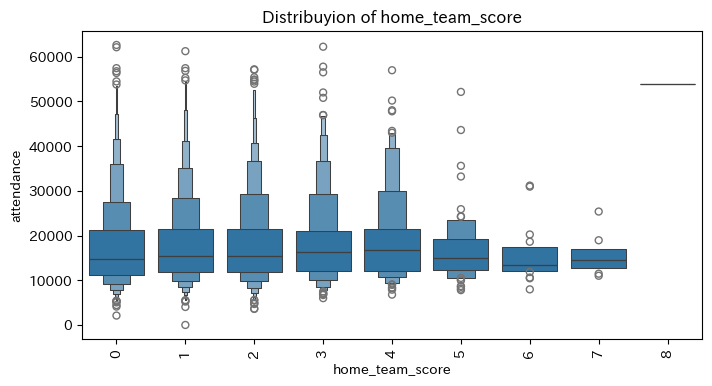

In [60]:
plot_cat_distribution(train_df, "home_team_score", "attendance")

## away_team_score

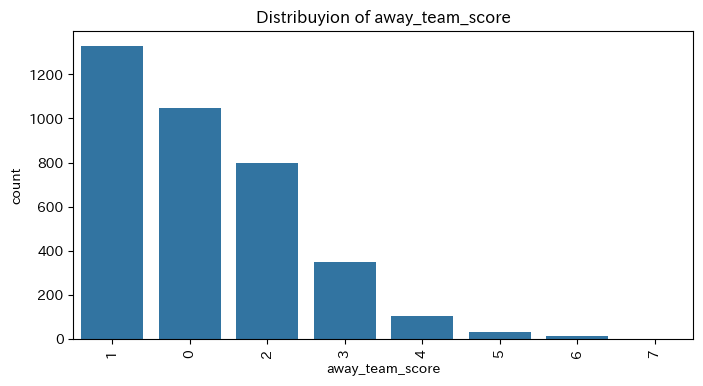

In [61]:
plot_cat_counts(train_df, "away_team_score")

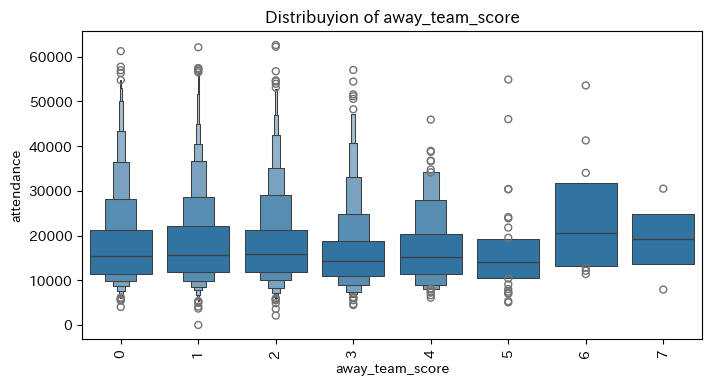

In [62]:
plot_cat_distribution(train_df, "away_team_score", "attendance")

## 数値データ分析
## tempreture

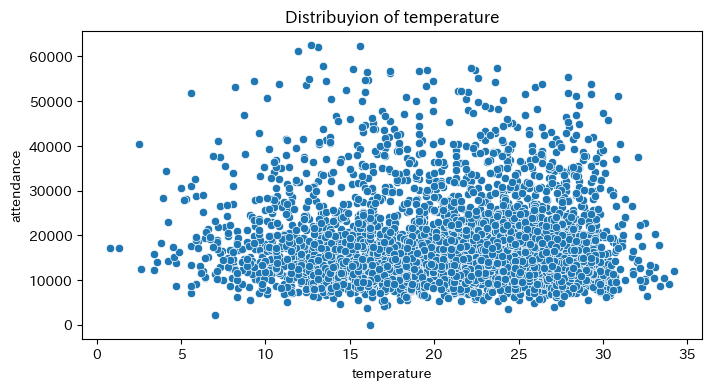

In [53]:
plot_num_target_distribution(train_df, "temperature", "attendance")

## humidity

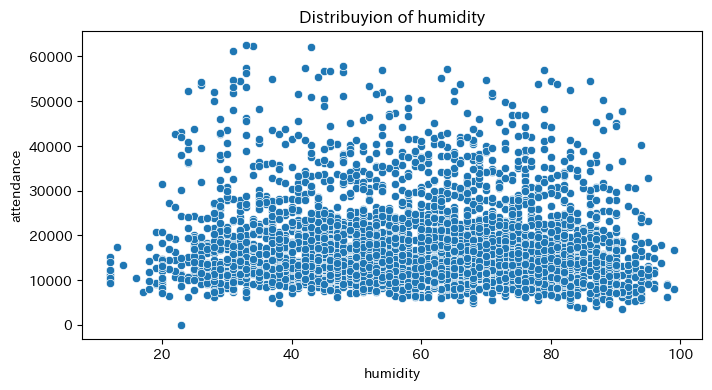

In [54]:
plot_num_target_distribution(train_df, "humidity", "attendance")

## チームメンバー

In [158]:
latest_df = train_df.loc[train_df["year"] >= 2016,  [f"home_team_player{i+1}" for i in range(11)]+[f"away_team_player{i+1}" for i in range(11)]+["attendance"]]

In [159]:
home_players = []

for i in range(1, 12):
    tmp_df =  pd.DataFrame(latest_df.groupby(f"home_team_player{i}")["attendance"].mean()).reset_index()
    most_popular_player = tmp_df.loc[tmp_df["attendance"] == tmp_df["attendance"].max(), f"home_team_player{i}"].iloc[0]
    home_players.append(most_popular_player)

print(home_players)

['1 西川周作 GK', '14 平川忠亮 DF', '29 吉本一謙 DF', '3 宇賀神友弥 DF', '13 宮崎智彦 MF', '7 梅崎司 MF', '22 阿部勇樹 MF', '16 青木拓矢 MF', '9 武藤雄樹 MF', '9 太田吉彰 MF', '8 ラファエルシルバ FW']


In [160]:
away_players = []

for i in range(1, 12):
    tmp_df =  pd.DataFrame(latest_df.groupby(f"away_team_player{i}")["attendance"].mean()).reset_index()
    most_popular_player = tmp_df.loc[tmp_df["attendance"] == tmp_df["attendance"].max(), f"away_team_player{i}"].iloc[0]
    away_players.append(most_popular_player)

print(away_players)

['27 丹野研太 GK', '41 高橋祥平 DF', '3 河本裕之 DF', '3 西野貴治 DF', '38 菊池大介 MF', '6 扇原貴宏 MF', '16 マテウス MF', '7 遠藤保仁 MF', '13 丸岡満 MF', '22 中野嘉大 FW', '16 齊藤和樹 FW']


In [163]:
most_popular_players = list(set(home_players + away_players))